<B><H1><center>Проект по теме "Принятие решений в бизнесе"</center></H1></B>

## Описание проекта

Для увеличения выручки крупного интернет-магазина подготовлен список гипотез, которые нужно приоритизировать, а также результаты A/B-тестов для проведения анализа.

In [ ]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.float_format', '{:_.2f}'.format)

## Часть 1. Приоритизация гипотез

### Открытие данных

In [ ]:
path = '/datasets/hypothesis.csv'

In [ ]:
hypothesis = pd.read_csv(path)

In [ ]:
display(hypothesis.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Нам представлено 9 гипотез, а также 4 их характеристики. Таблица небольшая, поэтому сразу видно отсутствие пропусков и дубликатов. Самый максимальный охват имеет гипотеза №7, наибольшее влияние - №0, а максимальные усилия нужны для гипотезы №1.

Чтобы выяснить приоритеты для рассмотрения гипотез, применим фреймворк ICE.

In [ ]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
print(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     Hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

По фреймворку ICE в лидерах по приоритету гипотезы 8, 0 и 7. Чтобы выяснить приоритеты для рассмотрения гипотез, применим фреймворк RICE.

In [ ]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
print(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     Hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

По фреймворку RICE в лидерах по приоритету гипотезы 7, 2 и 0, а лидер рейтинга ICE гипотеза №8 опустился ниже, что вызвано использованием параметра Reach/Охват, по которому гипотеза №8 набрала очень мало баллов. 
Поэтому рекомендуется приоритетными считать гипотезы №7 и №0, у которых оптимальными являются показатели всех четырех параметров.

## Часть 2. Приоритизация гипотез

### Открытие данных

In [ ]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [ ]:
display(orders.head(10))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


У нас есть таблица с данными по 1197 заказам - дате, сумме, id, id клиента и группе. Дата представлена в формате объекта, то лучше изменить. Пропусков нет.

In [ ]:
display(visitors.head(10))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В данных по посетителям за каждый день 62 строки - по 31 на каждую группу. Даты также представлены в неудобном формате, а пропусков нет.

### Предобработка данных

Переведем данные с датами заказа в соответствующий формат, а также выявим самый ранний и самый последний заказ.

In [ ]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [ ]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [ ]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [ ]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [ ]:
orders.duplicated().sum()

0

In [ ]:
visitors.duplicated().sum()

0

Нам представлены данные с 1 по 31 августа 2019 года. Пропусков и дубликатов нет. Проверим, все ли пользователи в группах уникальны.

In [ ]:
duplicated_users = orders.groupby("visitorId").agg({'group' : ['unique', 'nunique']})
duplicated_users.columns = ['group_name', 'group_number']
print('Количество дублирующихся пользователей:', len(duplicated_users.query('group_number > 1')))

Количество дублирующихся пользователей: 58


In [ ]:
print(len(orders[orders['group'] == 'A']))

557


In [ ]:
print(len(orders[orders['group'] == 'B']))

640


Ничего себе, группы разного размера, да еще и с повторяющимися пользователями! Доля дублирующихся пользователей довольно большая, около 10%, поэтому удалить их мы не можем, кроме того, эти же пользователи учтены в датафрейме с посещениями, и убрать их оттуда невозможно. Для реального исследования такие исходные данные были бы стоп-сигналом, но для учебного проекта будем довольствоваться тем, что есть. 

### Анализ результатов A/B теста

#### Кумулятивная выручка по группам

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [ ]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Text(0, 0.5, 'Куммулятивная выручка')

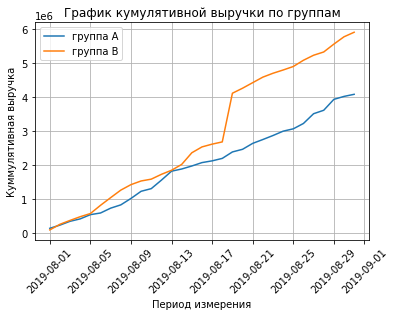

In [ ]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')
plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Период измерения')
plt.ylabel('Куммулятивная выручка')

В начале измерений рейтинги идут параллельно, затем выше становится выручка группа B, примерно на трети исследования выручки совпадают, а затем снова заметно лидирует группа B.

#### Кумулятивный средний чек по группам

Text(0, 0.5, 'Куммулятивный средний чек')

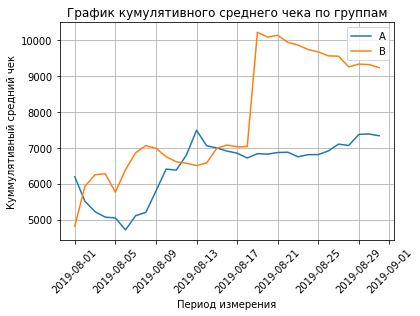

In [ ]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Период измерения')
plt.ylabel('Куммулятивный средний чек')

По среднему чеку после середины исследования резко растут показатели по группе B, а показатели по группе A находятся примерно на одном уровне.

#### Относительное изменение кумулятивного среднего чека группы B к группе A

Text(0, 0.5, 'Относительное изменение')

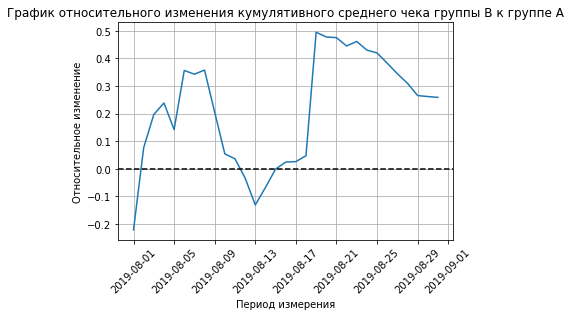

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Период измерения')
plt.ylabel('Относительное изменение')

График показывает, что, несмотря на низкий старт и падение в середине периода измерения, показатели по группе B лучше показателей группы А, и к концу исследуемого периода практически на 30% превышают другую группу.

#### Кумулятивная конверсия по группам

In [ ]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

Text(0, 0.5, 'Куммулятивная конверсия')

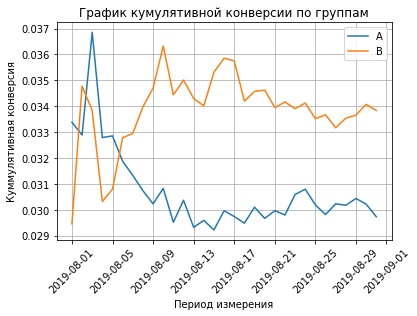

In [ ]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Период измерения')
plt.ylabel('Куммулятивная конверсия')

После начального периода с флуктуациями значений лидерство опять же за группой B, конверсия которой выше другой группы на протяжении почти 3/4 всего измерения.

#### Относительное изменение кумулятивной конверсии группы B к группе A

Text(0, 0.5, 'Изменение конверсии')

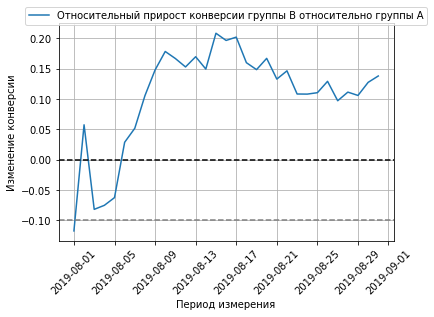

In [ ]:
mergedCumulativeConversion = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], on = 'date', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversion['date'], mergedCumulativeConversion['conversionB'] / mergedCumulativeConversion['conversionA'] - 1, label = 'Относительный прирост конверсии группы B относительно группы A')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Период измерения')
plt.ylabel('Изменение конверсии')

И опять же в начале месяца мы замечаем низкий старт группы B и колебания, но уже через неделю явным лидером определяется группа B.

#### График числа заказов по пользователям

In [ ]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
display(ordersByUsers.sort_values('orders', ascending=False))

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


Text(0, 0.5, 'Заказы')

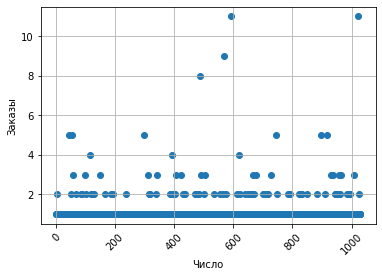

In [ ]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Число')
plt.ylabel('Заказы')

У большинства пользователей по 1 заказу, также много заказавших дважды, а пользователей с количеством заказов более 5 практиески нет.

#### Определение перцентилей по числу заказов

In [ ]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


In [ ]:
too_many_orders = 4

Только 1 процент пользователей заказывает больше 4 раз, а у 95% пользователей не больше 2 заказов. Поэтому будем считать аномалиями число заказов более 4. 

#### График стоимости заказов

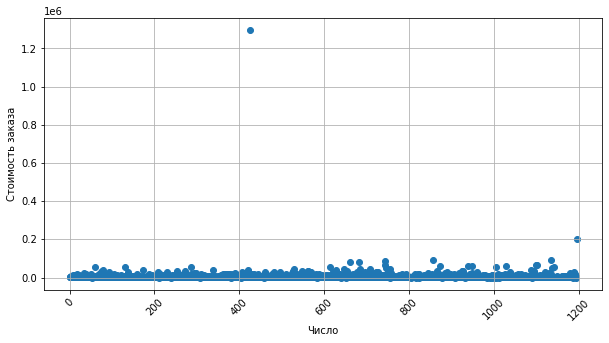

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue'])
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Число')
plt.ylabel('Стоимость заказа')
plt.show()

In [ ]:
orders['revenue'].describe()

count       1_197.00
mean        8_348.01
std        39_191.13
min            50.00
25%         1_220.00
50%         2_978.00
75%         8_290.00
max     1_294_500.00
Name: revenue, dtype: float64

Значений выше 20000 практически нет, большинство пользователей тратят на заказ не более 8000. Также нашелся аномально дорогой заказ на 1294500, сломавший нам всю статистику. 

#### Определение перцентилей по стоимости заказов

In [ ]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


95% пользователей потратили не более 28000 за заказ, и только 1% заказов дороже 58000. Сочтем за аномалии размер 99 перцентиля - 58233.2.

In [ ]:
expensive_orders = 58233.2

#### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [ ]:
visitsA, visitsB = visitors.query('group == "A"'), visitors.query('group == "B"')

In [ ]:
ordersA = orders.query('group == "A"').groupby('visitorId', as_index=False)\
                .agg({'transactionId' :'nunique', 'revenue':'sum'}).rename(columns = {'transactionId' : 'orders'})
ordersB = orders.query('group == "B"').groupby('visitorId', as_index=False)\
                .agg({'transactionId' :'nunique', 'revenue':'sum'}).rename(columns = {'transactionId' : 'orders'})

In [ ]:

sampleA = ordersA['orders'].append(pd.Series([0] * (visitsA['visitors'].sum() - ordersA.shape[0]), name = 'orders'))
sampleB = ordersB['orders'].append(pd.Series([0] * (visitsB['visitors'].sum() - ordersB.shape[0]), name = 'orders'))

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


P-value меньше 0.05, значит, по «сырым» данным различия в конверсии групп A и B есть. Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, можно отвергнуть. 
Относительный выигрыш группы B - 13,8%.

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако средний чек группы B значительно больше среднего чека группы A.

#### Статистическая значимость различий в конверсии между группами по отфильтрованным данным

Сначала отчистим данные от аномалий, используя ограничения, выявленные в точечных графиках и перцентилях по стоимости и количеству заказов.

In [ ]:
usersWithExpensiveOrders = orders[orders['revenue'] > expensive_orders]['visitorId']

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersA[ordersA['orders'] >too_many_orders]['visitorId'],
        ordersB[ordersB['orders'] >too_many_orders]['visitorId']

    ],
    axis=0
)

In [ ]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
    .drop_duplicates()
    .sort_values()
        
    )

In [ ]:
print(abnormalUsers.head(5))
print(abnormalUsers.shape)
print()

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64
(15,)



Выявлено 53 аномальных пользователя, которых мы и уберем из данных для расчета.

In [ ]:
sampleAFiltered = ordersA[
            np.logical_not(ordersA['visitorId'].isin(abnormalUsers))
        ]['orders'].append(pd.Series([0] * (visitsA['visitors'].sum() - ordersA.shape[0]), name = 'orders'))


In [ ]:
print(ordersA)

      visitorId  orders  revenue
0       8300375       1     1790
1      11685486       1     6201
2      54447517       1      130
3      66685450       1     7990
4      78758296       1     1044
..          ...     ...      ...
498  4243832526       1     8290
499  4256040402       7    48800
500  4259830713       1     3190
501  4266935830       1    78990
502  4278982564       1    24744

[503 rows x 3 columns]


In [ ]:
sampleBFiltered = ordersB[
            np.logical_not(ordersB['visitorId'].isin(abnormalUsers))
        ]['orders'].append(pd.Series([0] * (visitsB['visitors'].sum() - ordersB.shape[0]), name = 'orders'))


In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.014
0.153


P-value меньше 0.05.
Значит, можно отвергать нулевую гипотезу и считать, что в конверсии есть различия.
Конверсия группы B выше конверсии группы A.

#### Статистическая значимость различий в среднем чеке заказа между группами по отфильтрованным данным

In [ ]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            ordersA[
            np.logical_not(ordersA['visitorId'].isin(abnormalUsers))
        ]['revenue'],
            ordersB[
            np.logical_not(ordersB['visitorId'].isin(abnormalUsers))
        ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        ordersB[
            np.logical_not(ordersB['visitorId'].isin(abnormalUsers))
        ]['revenue'].mean()
        / ordersA[
            np.logical_not(ordersA['visitorId'].isin(abnormalUsers))
        ]['revenue'].mean()
        - 1
    )
)

0.997
-0.011


P-value значительно больше 0.05.
Значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия.
Однако, средний чек группы B чуть выше среднего чека группы A.

По сырым данным мы видим, что выражены отличия в конверсии, она выше в группе B. Отличий по среднему чеку не выявлено, хотя средний чек в группе В несколько выше, чем в другой группе. После удаления выбросов ситуация остается такой же, разница только становится еще более явной - конверсия еще выше и различия заметны, а средний чек выше, хотя в выборках и не обнаружены отличия. 

## Вывод

Для анализа нам были предоставлены 3 набора данных - список гипотез с оценками для расчета приоритета, а также данных по двум группам пользователей и их заказам за август 2019 года для оценки результатов A/B теста.

При предобработке данных обнаружилось, что пропусков и явных дубликатов нет, пришлось только заменить тип данных для дат для удобства расчетов. Мы приготовили данные по гипотезам к анализу. 
Что касается данных по проведению A/B тестов, в них выявлены серьезные недостатки - размеры групп А и В заметно отличаются (почти на 10%), и примерно столько же пользователей оказались одновременно в двух группах. Для настоящего анализа такие данные были бы непригодными, но для учебного проекта я решила оставить данных пользователей, их удаление сильно изменило бы результаты.

### Часть 1

При расчете приоритета гипотез использовались фреймворки ICE и RICE, по результатам которых лидеры отличались. При расчете без учета параметра Reach (охват) наиболее приоритетными оказались гипотезы №8, №0 и №7. Но если добавить в расчет параметр охвата, в приоритете стали гипотезы №7, №2 и №0. Лидер предыдущего расчета гипотеза №8 обладает слишком низкой оценкой охвата, значит, ее приоритетное использование не рекомендуется, ведь при ее применении результат вряд ли  окажется значимым. Скорее, логичнее будет сначала провести проверку гипотез №7 и №0, которые получили неплохие оценки по всем критериям сразу.

### Часть 2

Практически по всем построенным графикам - кумулятивной выручки, кумулятивного среднего чека, кумулятивной конверсии - выходит вперед группа В. При этом заметны явные скачки в позициях, что означает наличие выбросов, влияющих на средние показатели.

При расчете статистической значимости различий в конверсии по сырым данным заметна разница в пользу показателей группы В. Что касается статистической значимости по среднему чеку, то мы не можем подтвердить различия, хотя средний чек группы В несколько больше, чем у группы А.

Я рассчитала сумму и стоимость заказов на пользователя, на основании которых удалила явные выбросы. 
После очистки данных результаты проверки статистической значимости различий конверсии и среднего чека схожи - в конверсии между группами есть различия, выше она в группе В, а в среднем чеке различия не выявлены, хотя опять же в группе В его величина чуть выше.

Если игнорировать огрехи предоставленных данных и представить, что результаты основаны на достоверных и правильно собранных материалах, то заметно некоторое преимущество группы В. Оно явно в категории конверсии, и если главной целью является именно повышение конверсии, то тест можно считать завершенным и признать победителем группу В. Если же основной целью являлось повышение суммы среднего чека, то лучше продолжить тестирование и получить больше данных.
В идеале же тест лучше начать снова, а для начала провести A/A тестирование, чтобы удостовериться в качестве собираемых данных.